In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8")
data = pd.read_csv("smoking.csv")
data.head()

,Country,Year,Data.Daily cigarettes,Data.Percentage.Male,Data.Percentage.Female,Data.Percentage.Total,Data.Smokers.Total,Data.Smokers.Female,Data.Smokers.Male
0,Afghanistan,1980,5.7,10.4,18.4,2.4,733520,81707,651813
1,Afghanistan,1981,5.8,10.5,18.4,2.3,720102,79276,640826
2,Afghanistan,1982,5.8,10.5,18.5,2.3,700415,76061,624355
3,Afghanistan,1983,5.9,10.5,18.6,2.3,676984,72411,604572
4,Afghanistan,1984,6.0,10.6,18.6,2.3,653812,68908,584905


In [3]:
data_smokers = data[:33]
smokers_female = data_smokers["Data.Smokers.Female"]
smokers_male = data_smokers["Data.Smokers.Male"]
data_time = data_smokers["Year"]
data_total = data_smokers["Data.Smokers.Total"]

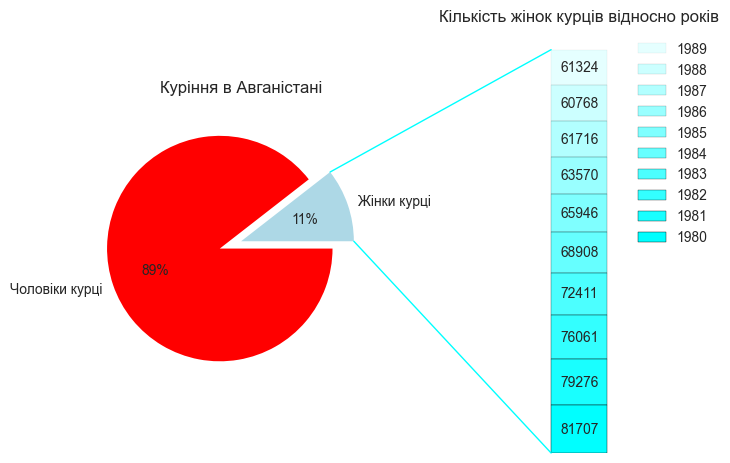

In [74]:
from matplotlib.patches import ConnectionPatch
fig, (ax1, ax2) = plt.subplots(1, 2)

explode = (0.0, 0.2)
a = [sum(smokers_female[:10]), sum(smokers_male[:10])]
kv = ['Жінки курці', 'Чоловіки курці']
colors = ["lightblue", "red"]

wedges, *_ = ax1.pie(a, labels = kv, colors=colors, autopct="%1.f%%", explode=explode)
ax1.set_title("Куріння в Авганістані")

bar_labels = np.array(data_time[:10])
bar_values = np.array(smokers_female[:10])

bottom = 0
width = .2

for i , (height, label) in enumerate(reversed([*zip(bar_values, bar_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color="aqua", label=label, alpha= 0.1 + 0.1 * i, edgecolor="black")
    ax2.bar_label(bc, label_type="center")



ax2.set_title("Кількість жінок курців відносно років")
ax2.legend()
ax2.axis("off")
ax2.set_xlim(-2.5 * width, 2.5 * width)

theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(bar_values)

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con1 = ConnectionPatch(xyA=(-width/2, 0), coordsA=ax2.transData, xyB=(x, y), coordsB=ax1.transData)
con1.set_color("aqua")
con1.set_linewidth(1)
ax2.add_artist(con1)

x1 = r * np.cos(np.pi / 180 * theta1) + center[0]
y1 = r * np.sin(np.pi / 180 * theta1) + center[1]
con2 = ConnectionPatch(xyA=(-width/2, -bar_height), coordsA=ax2.transData, xyB=(x1, y1), coordsB=ax1.transData)
con2.set_color("aqua")
con2.set_linewidth(1)
ax2.add_artist(con2)


plt.show()

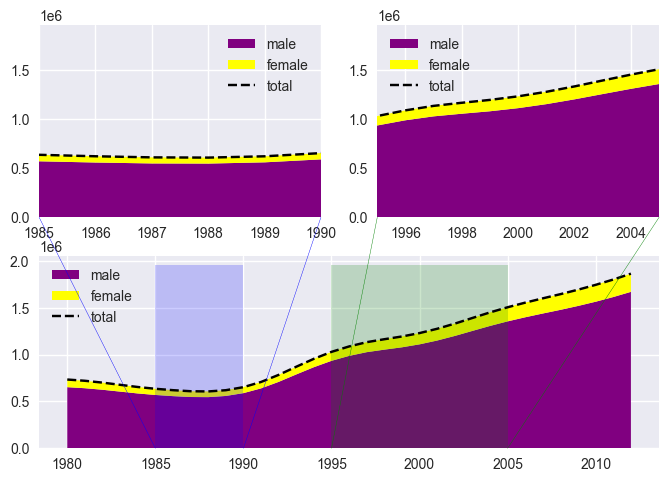

In [24]:
from matplotlib.patches import ConnectionPatch
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, (3,4))

ax1.stackplot(data_time, [smokers_male, smokers_female],  colors=['purple', "yellow"], labels=["male", "female"])
ax1.plot(data_time, data_total, "k--", label="total")
ax1.set_xlim(1985, 1990)
ax1.legend()

ax2.stackplot(data_time, [smokers_male, smokers_female],  colors=['purple', "yellow"], labels=["male", "female"])
ax2.plot(data_time, data_total, "k--", label="total")
ax2.set_xlim(1995, 2005)
ax2.legend()



ax3.stackplot(data_time, [smokers_male, smokers_female], colors=['purple', 'yellow'], labels=["male", "female"])
ax3.plot(data_time, data_total, "k--", label="total")

[ymin, ymax] = ax3.get_ylim()
ax3.fill_between((1985, 1990), ymin, ymax, facecolor="blue", alpha=0.2)
ax3.fill_between((1995, 2005), ymin, ymax, facecolor="green", alpha=0.2)

con1 = ConnectionPatch(xyA=(1985, 0.), coordsA=ax1.transData, xyB=(1985, 40.), coordsB=ax3.transData, color="blue")
con2 = ConnectionPatch(xyA=(1990, 0.), coordsA=ax1.transData, xyB=(1990, 40.), coordsB=ax3.transData, color="blue")
fig.add_artist(con1)
fig.add_artist(con2)

con3 = ConnectionPatch(xyA=(1995, 0.), coordsA=ax2.transData, xyB=(1995, 40.), coordsB=ax3.transData, color="green")
con4 = ConnectionPatch(xyA=(2005, 0.), coordsA=ax2.transData, xyB=(2005, 40.), coordsB=ax3.transData, color="green")
fig.add_artist(con3)
fig.add_artist(con4)


ax3.legend()
plt.show()

In [ ]:
fig, ax_outer = plt.subplots()

ax_outer.stackplot(data_time, [data_total, smokers_male, smokers_female], colors=['purple', 'yellow', "green"], labels=["male", "female", "total"])
inner_ax = fig.add_axes([0.6, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
inner_ax.plot(data_time, smokers_male, label='male', color='red')
ax_outer.legend()
inner_ax.legend()
plt.show()